In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.datasets import fetch_california_housing

# Load the dataset

In [10]:
data = fetch_california_housing()

In [12]:
X = pd.DataFrame(data.data, columns=data.feature_names)  # Features
y = pd.Series(data.target, name="MedianHouseValue")      # Target variable


# Exploratory Data Analysis

In [19]:
print("Dataset Overview:")
print(X.head())  # Display the first 5 rows
print("\nDataset Shape:", X.shape)
print("\nMissing Values:")
print(X.isnull().sum())


Dataset Overview:
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25  

Dataset Shape: (20640, 8)

Missing Values:
MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64


In [20]:
# Summary statistics
print("\nSummary Statistics:")
print(X.describe())


Summary Statistics:
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude  
count  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704  
std       10.386050      2.135952      2.003532  
min        0.692308     32.540000   -124.350000  
25%        2.4297

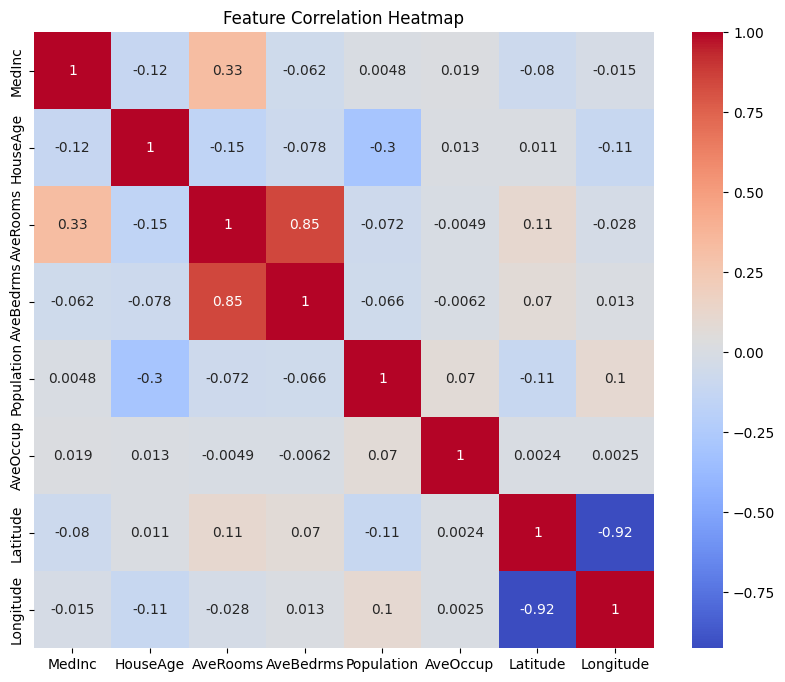

In [21]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(X.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()


In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [25]:
# Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [26]:
# Step 4: Model Training
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [27]:
# Predict on the test set
y_pred = model.predict(X_test_scaled)

In [28]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [29]:
print("\nModel Performance:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R² Score: {r2:.2f}")


Model Performance:
Mean Squared Error (MSE): 0.53
Mean Absolute Error (MAE): 0.53
R² Score: 0.60


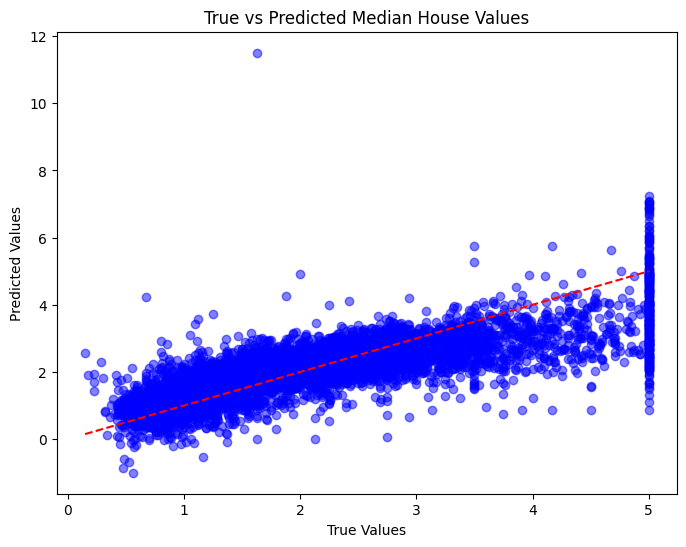

In [30]:
# Scatter plot of true vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color="blue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "--", color="red")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("True vs Predicted Median House Values")
plt.show()

In [31]:
# Step 7: Feature Importance Analysis
feature_importance = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_
}).sort_values(by="Coefficient", ascending=False)


In [32]:
print("\nFeature Importance:")
print(feature_importance)



Feature Importance:
      Feature  Coefficient
0      MedInc     0.849222
3   AveBedrms     0.348410
1    HouseAge     0.122119
4  Population    -0.000884
5    AveOccup    -0.041698
2    AveRooms    -0.299558
7   Longitude    -0.868617
6    Latitude    -0.893856


C:\Users\asus\AppData\Local\Temp\ipykernel_17204\3814471395.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Coefficient", y="Feature", data=feature_importance, palette="viridis")


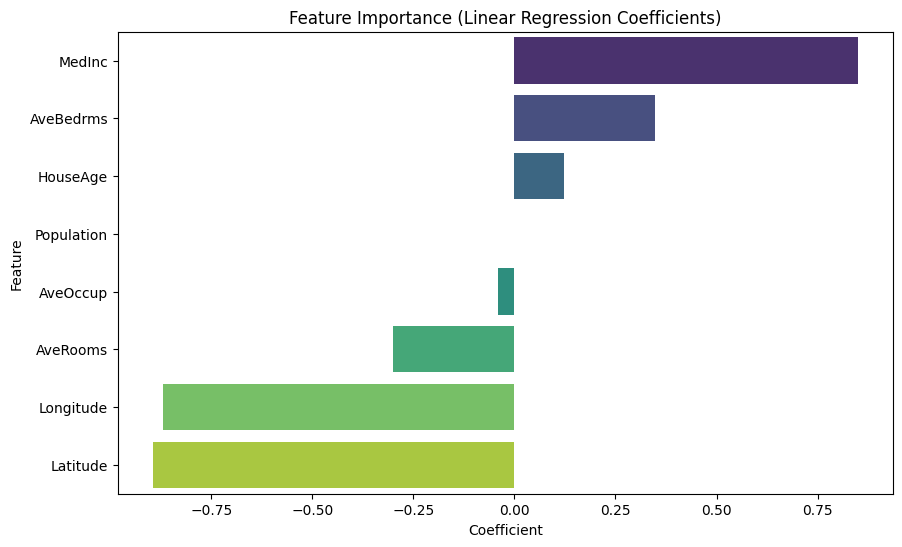

In [33]:
# Bar plot of feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x="Coefficient", y="Feature", data=feature_importance, palette="viridis")
plt.title("Feature Importance (Linear Regression Coefficients)")
plt.show()

In [ ]:
import 